In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [3]:
data = pd.read_csv('Data/kody_stacji.csv', encoding='windows-1250',delimiter=";")    
#Zwykłe kodowanie utf-8 nie działało --> po otwarciu pliku w Excelu można sprawdzić rodzaj kodowania 
data = data.set_index('LP.')   #ustawiam indeks 
data

,ID,Nazwa,Rzeka,Szerokość geograficzna,Długość geograficzna,Wysokość n.p.m.
LP.,,,,,,
1,250180590,RYBNIK-STODOŁY,Ruda,50 09 16,18 28 59,216
2,254140010,DZIWNÓW,NaN,54 01 20,14 43 54,7
3,250160530,ZIELENIEC,Bystrzyca Dusznicka,50 19 48,16 23 39,840
4,250160630,MIĘDZYGÓRZE,Wilczka,50 13 06,16 46 23,800
5,250160650,MIĘDZYLESIE,Nysa Kłodzka,50 09 12,16 40 15,453
...,...,...,...,...,...,...
637,250140020,SIENIAWKA,Nysa Łużycka,50 53 38,14 50 08,234
638,250160920,PIŁAWA GÓRNA,Piława,50 41 22,16 43 57,295
639,249180590,RUPTAWA,Olza,49 56 12,18 35 22,230


C:\Users\Zuzia\AppData\Local\Temp\ipykernel_18088\3892555172.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  poland = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


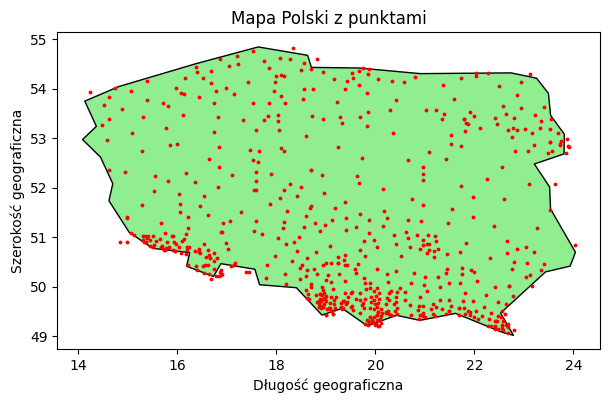

In [5]:
# Funkcja do konwersji współrzędnych na obiekty Shapely Point
def convert_to_point(row):
    lat, lon = row['Szerokość geograficzna'], row['Długość geograficzna']
    lat_deg, lat_min, lat_sec = map(float, lat.split())
    lon_deg, lon_min, lon_sec = map(float, lon.split())
    latitude = lat_deg + lat_min / 60 + lat_sec / 3600
    longitude = lon_deg + lon_min / 60 + lon_sec / 3600
    return Point(longitude, latitude)

# Dodanie kolumny z obiektami Point
data['geometry'] = data.apply(convert_to_point, axis=1)

# Tworzenie ramki GeoPandas
gdf = gpd.GeoDataFrame(data, geometry='geometry')

# Wczytanie granic administracyjnych Polski
poland = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
poland = poland[poland.name == 'Poland']

# Tworzenie mapy
fig, ax = plt.subplots(figsize=(7, 5))
poland.plot(ax=ax, color='lightgreen', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=3)
plt.title('Mapa Polski z punktami')
plt.xlabel('Długość geograficzna')
plt.ylabel('Szerokość geograficzna')
plt.show()